In [1]:
# %% libraries
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc

In [2]:
# %%  matplotlib viz setup
plt.style.use('seaborn-bright')
rc('font',**{'family':'sans-serif','sans-serif':['Avant Garde']})
rc('text', usetex=False)

In [3]:
# %% fake data
np.random.seed(19680801)
mu = 2.5
sigma = 4
n_bins = 50
x = np.random.normal(mu, sigma, size=1000)

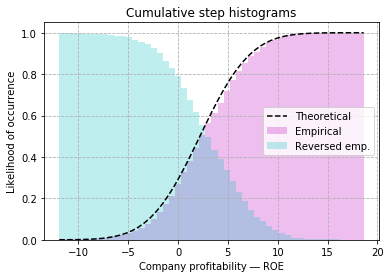

In [7]:
# figure framework
fig = plt.figure(figsize=(6, 4))

# create plot
ax = fig.add_subplot()

# plot the cumulative histogram
n, bins, patches = ax.hist(x, n_bins, density=True, histtype='stepfilled',
                           cumulative=True, label='Empirical', color='m',
                           alpha=0.25)

# add a line showing the expected distribution.
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))   # calculate PDF = probability density func
y = y.cumsum()                                      # calculate CDF = culmulative density func
y /= y[-1]                                          # calculate CDF = culmulative density func

ax.plot(bins, y, 'k--', linewidth=1.5, label='Theoretical', color='k')

# overlay a reversed cumulative histogram
ax.hist(x, bins=bins, density=True, histtype='stepfilled', cumulative=-1,
        label='Reversed emp.', color='c', alpha=0.25)

# grid line
ax.grid(True, ls='--')

# legend
ax.legend(loc='right')

# metadata
ax.set_title('Cumulative step histograms')
ax.set_xlabel('Company profitability ― ROE')
ax.set_ylabel('Likelihood of occurrence')

# save plot to file
out_f = os.path.join(os.getcwd(), 'tech_sci_hist.pdf')
plt.savefig(out_f,
            transparent=True,
            bbox_inches='tight',
            pad_inches=0)

# show plot
#plt.show()